# Objective


# Insights


# Recommendations


# Limitations


In [73]:
import pandas as pd
df = pd.read_csv("Sample - Superstore.csv", encoding="latin-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [74]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df['ShipDuration'] = (df['Ship Date'] - df['Order Date']).dt.days
df['ShipDuration'].describe()
df['OrderY']=df['Order Date'].dt.year
df['OrderM']=df['Order Date'].dt.month
df['OrderD']=df['Order Date'].dt.day
df['Profitability']=df['Profit']/df['Sales']

In [75]:
# Compute implied unit price to verify per-SKU consistency
# (Discount is stored as absolute dollar reduction in this dataset)
df['Implied Unit Price'] = (df['Sales'] + df['Discount']) / df['Quantity']
df[['Product ID','Sales','Discount','Quantity','Implied Unit Price']].head()


,Product ID,Sales,Discount,Quantity,Implied Unit Price
0,FUR-BO-10001798,261.9600,0.00,2,130.9800
1,FUR-CH-10000454,731.9400,0.00,3,243.9800
2,OFF-LA-10000240,14.6200,0.00,2,7.3100
3,FUR-TA-10000577,957.5775,0.45,5,191.6055
4,OFF-ST-10000760,22.3680,0.20,2,11.2840


# Below is the plot showing distribution of shipping duration.

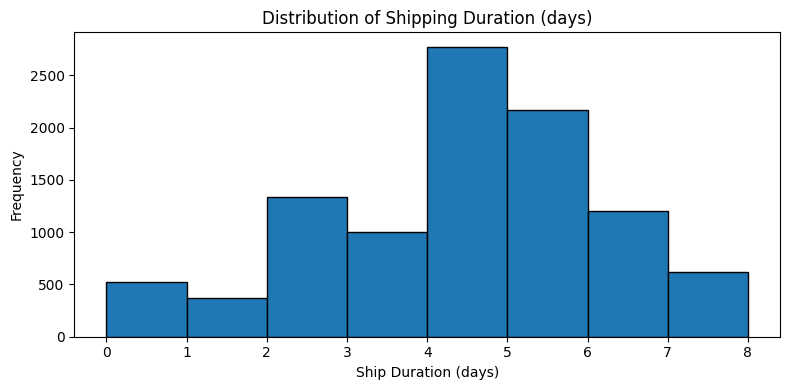

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
df['ShipDuration'].plot(kind='hist', bins=range(int(df['ShipDuration'].min()), int(df['ShipDuration'].max()) + 2), edgecolor='black')
plt.title('Distribution of Shipping Duration (days)')
plt.xlabel('Ship Duration (days)')
plt.ylabel('Frequency')
plt.tight_layout()

# Below is the plot of orders on each day of week

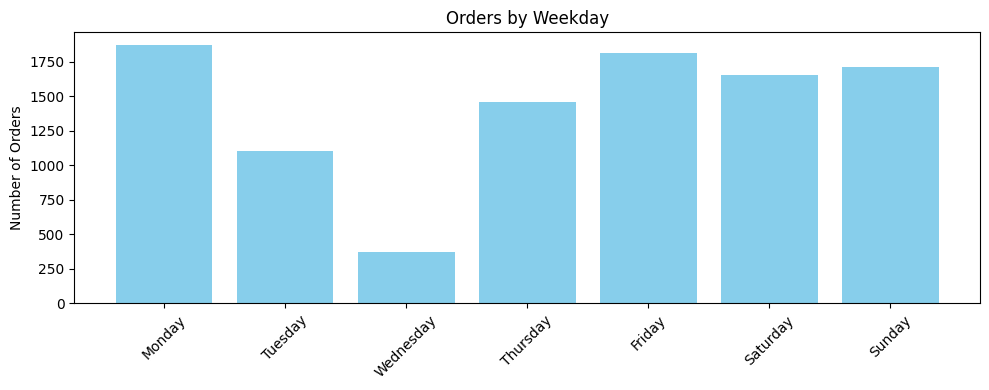

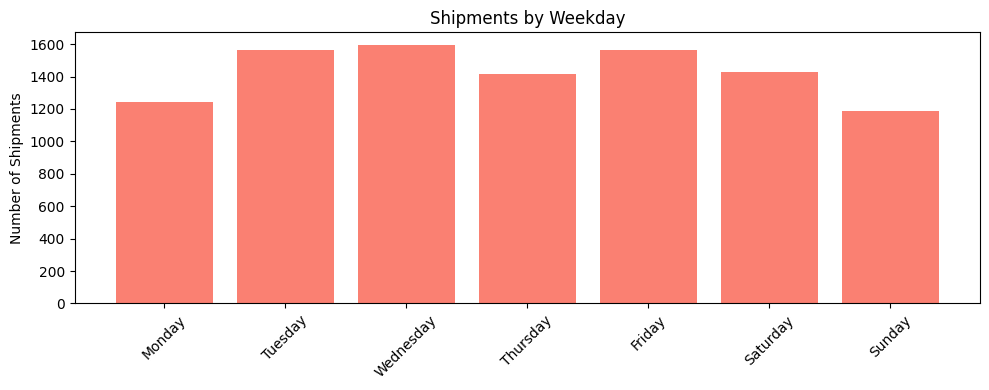

In [77]:
# Add weekday names
order_weekday_counts = df['Order Date'].dt.day_name().value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).fillna(0)
ship_weekday_counts = df['Ship Date'].dt.day_name().value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).fillna(0)

plt.figure(figsize=(10,4))
plt.bar(order_weekday_counts.index, order_weekday_counts.values, color='skyblue')
plt.title('Orders by Weekday')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(10,4))
plt.bar(ship_weekday_counts.index, ship_weekday_counts.values, color='salmon')
plt.title('Shipments by Weekday')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.tight_layout()

* As can be seen. On wednesday, very less orders were done maybe due to mid-week exhaustaion.
* The shiment date, however looks pretty uniform.

# The table below shows the detiails about Shipment mode, its delivery duration and their popularity among the customers.

In [78]:
shipmode_duration_stats = df.groupby('Ship Mode')['ShipDuration'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values('mean')
shipmode_duration_stats

,count,mean,median,min,max
Ship Mode,,,,,
Same Day,543,0.044199,0.0,0,1
First Class,1538,2.182705,2.0,1,4
Second Class,1945,3.238046,3.0,1,5
Standard Class,5968,5.006535,5.0,3,7


<Figure size 800x400 with 0 Axes>

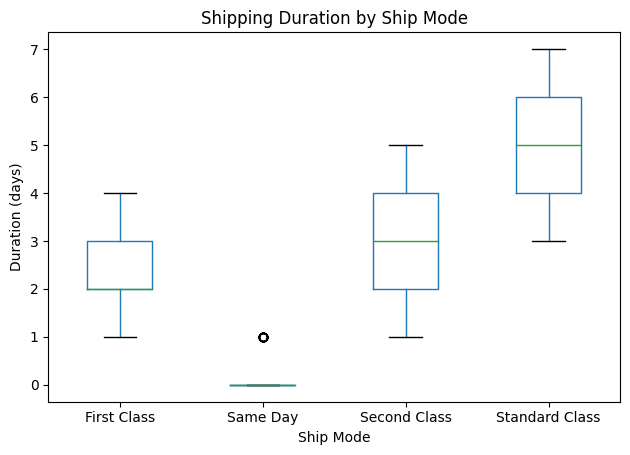

In [79]:
plt.figure(figsize=(8,4))
df.boxplot(column='ShipDuration', by='Ship Mode', grid=False)
plt.title('Shipping Duration by Ship Mode')
plt.suptitle('')
plt.ylabel('Duration (days)')
plt.tight_layout()

In [80]:
# Summarize shipping duration statistics by customer segment
segment_duration_stats = df.groupby('Segment')['ShipDuration'].agg(['count', 'mean', 'median', 'min', 'max']).sort_values('mean')
segment_duration_stats

,count,mean,median,min,max
Segment,,,,,
Home Office,1783,3.922042,4.0,0,7
Consumer,5191,3.941822,4.0,0,7
Corporate,3020,4.007616,4.0,0,7


As can be seen here, the average delivery duration does not change over different segments.

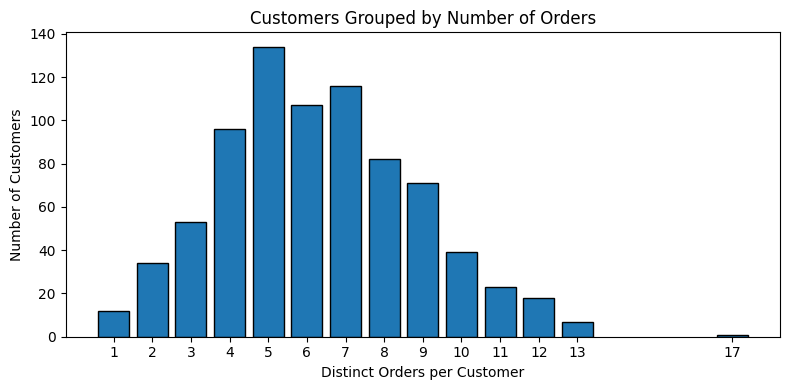

In [81]:
# Histogram: number of customers by their distinct order count
orders_per_customer = df.groupby('Customer ID')['Order ID'].nunique()
order_frequency = orders_per_customer.value_counts().sort_index()
plt.figure(figsize=(8,4))
plt.bar(order_frequency.index, order_frequency.values, edgecolor='black')
plt.title('Customers Grouped by Number of Orders')
plt.xlabel('Distinct Orders per Customer')
plt.ylabel('Number of Customers')
plt.xticks(order_frequency.index)
plt.tight_layout()

Majority of people are seen to place order on multiple occasions, since single orders are very less. This is a good thing and shows a positive shopping experience and customer satistfaction.

In [82]:
# Report the total number of customers represented in the histogram
orders_per_customer.count()

793

# The plot below shows the datewise distribution of number of orders placed

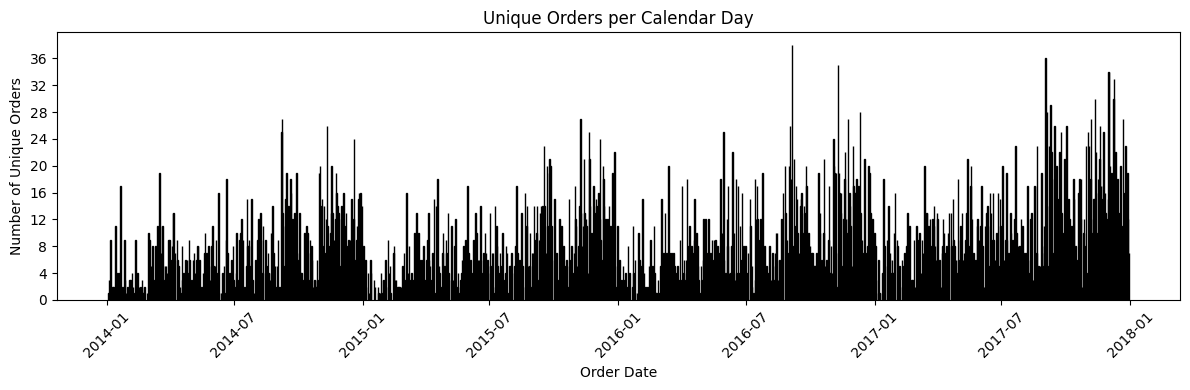

In [83]:
# Count unique orders per day
import matplotlib.ticker as ticker
orders_per_day = df.groupby('Order Date').size()
plt.figure(figsize=(12,4))
plt.bar(orders_per_day.index, orders_per_day.values, edgecolor='black')
plt.title('Unique Orders per Calendar Day')
plt.xlabel('Order Date')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

* It can be seen that a rise happens in Nov Dec followed by a dip in January Feburary, which can be easily explained with holiday spike and post-exhaustion.

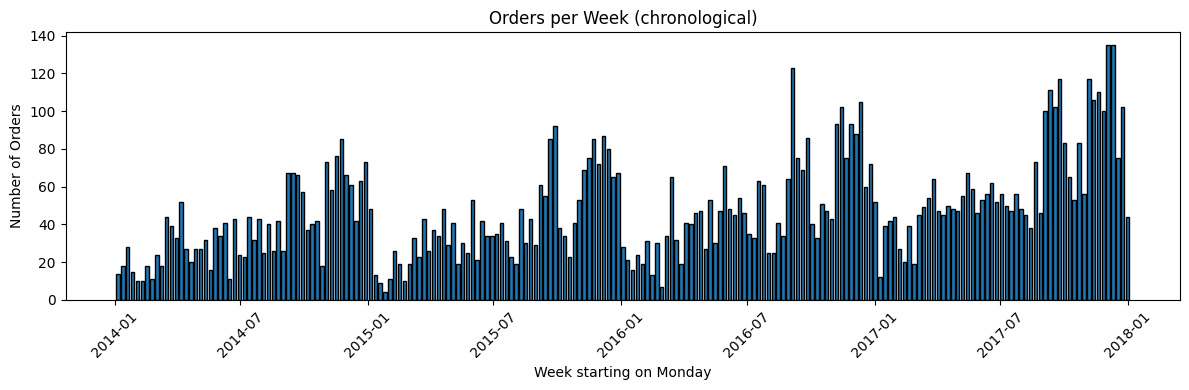

In [84]:
# Plot weekly order counts over time
weekly_order_counts = df.resample('W-MON', on='Order Date').size().asfreq('W-MON', fill_value=0)
plt.figure(figsize=(12,4))
plt.bar(weekly_order_counts.index, weekly_order_counts.values, width=5, align='center', edgecolor='black')
plt.title('Orders per Week (chronological)')
plt.xlabel('Week starting on Monday')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

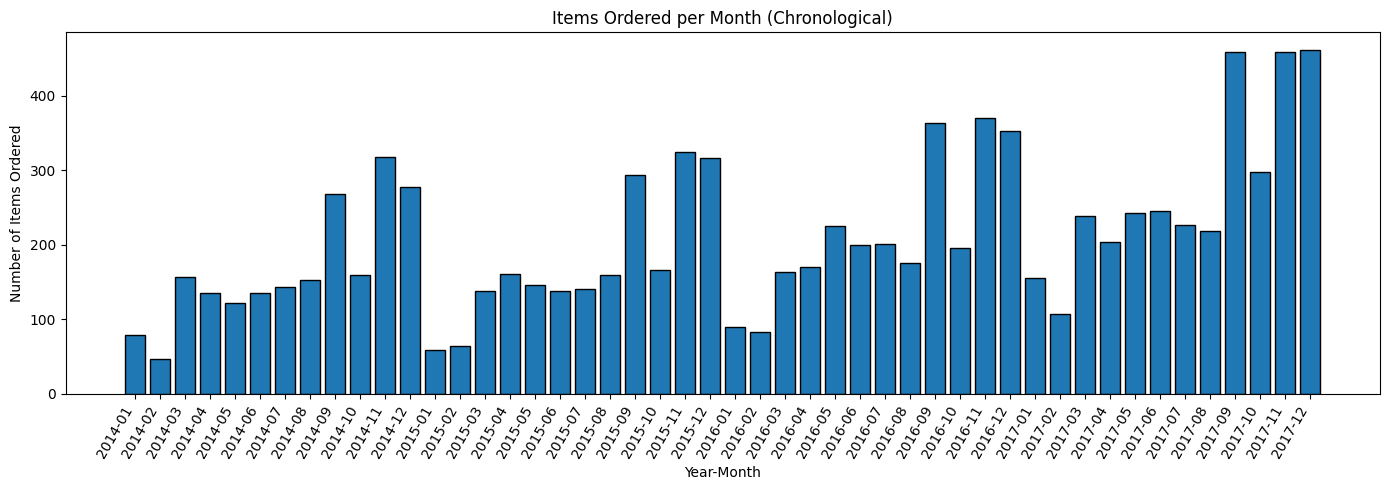

In [85]:
# Chronological bar plot: unique orders per month
monthly_order_counts = df.resample('M', on='Order Date').size().asfreq('M', fill_value=0)
plt.figure(figsize=(14,5))
plt.bar(monthly_order_counts.index.strftime('%Y-%m'), monthly_order_counts.values, edgecolor='black')
plt.title('Items Ordered per Month (Chronological)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Items Ordered')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

The plot here shows the decrease in peak when unique orders are counted.

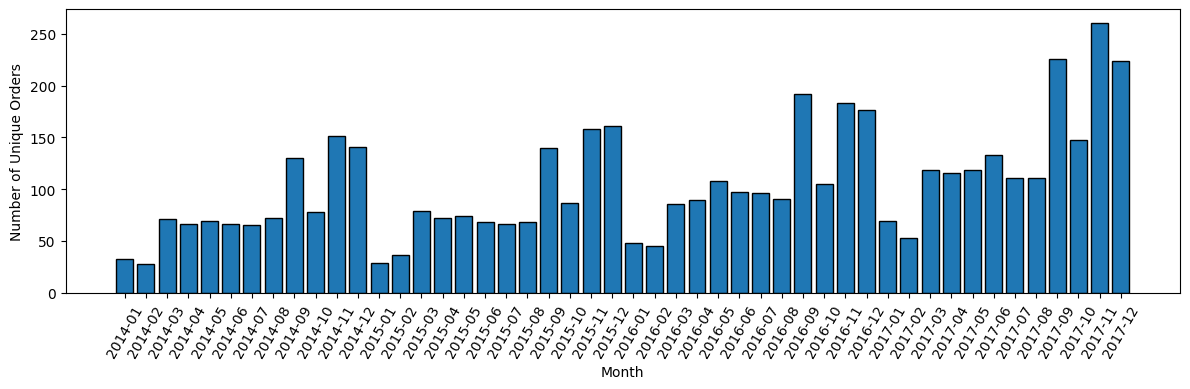

In [86]:
# Plot unique orders per month
# Drop duplicates to get unique orders
unique_orders = df.drop_duplicates(['Order ID', 'Order Date'])
# Group by month and count unique orders
monthly_unique_orders = unique_orders.resample('M', on='Order Date').size().asfreq('M', fill_value=0)
plt.figure(figsize=(12,4))
plt.bar(monthly_unique_orders.index.strftime('%Y-%m'), monthly_unique_orders.values, edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

# The plo below shows that dominant number of orders had only one item.
* This explains the not so significant change in the size of timewise plots distribution.

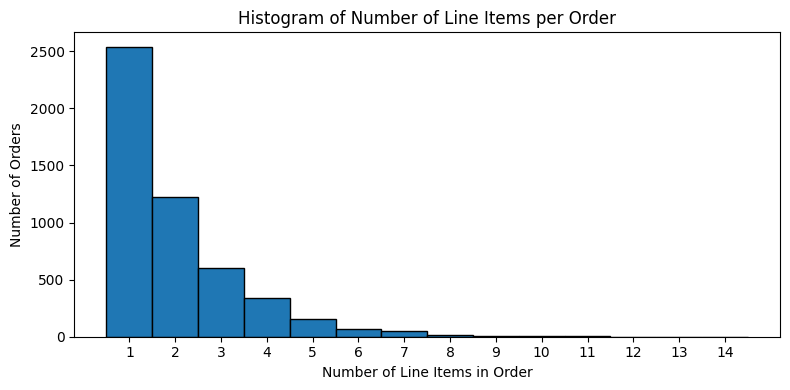

In [87]:
# Histogram: number of line items per order
order_line_counts = df.groupby('Order ID').size()
plt.figure(figsize=(8,4))
plt.hist(order_line_counts, bins=range(1, order_line_counts.max()+2), edgecolor='black', align='left')
plt.title('Histogram of Number of Line Items per Order')
plt.xlabel('Number of Line Items in Order')
plt.ylabel('Number of Orders')
plt.xticks(range(1, order_line_counts.max()+1))
plt.tight_layout()
plt.show()

In [88]:
df['Order Date'].min(), df[df['Order Date'].dt.year == 2014]['Order Date'].sort_values().head()

(Timestamp('2014-01-03 00:00:00'),
 7980   2014-01-03
 739    2014-01-04
 740    2014-01-04
 741    2014-01-04
 1759   2014-01-05
 Name: Order Date, dtype: datetime64[ns])

In [89]:
# Distinct orders per city
orders_per_city = df.groupby('City')['Order ID'].nunique().sort_values(ascending=False)
orders_per_city.head(10), orders_per_city.sum()

(City
 New York City    450
 Los Angeles      384
 San Francisco    265
 Philadelphia     265
 Seattle          212
 Houston          188
 Chicago          171
 Columbus         111
 San Diego         88
 Dallas            80
 Name: Order ID, dtype: int64,
 5009)

# LA and NewYork were the most popular cities in terms of number of orders

In [90]:
# Distinct order counts for every city
orders_per_city = (
    df.groupby('City')['Order ID']
    .nunique()
    .sort_values(ascending=False)
    .reset_index(name='distinct_orders')
)
orders_per_city

,City,distinct_orders
0,New York City,450
1,Los Angeles,384
2,San Francisco,265
3,Philadelphia,265
4,Seattle,212
...,...,...
526,Coral Gables,1
527,Port Orange,1
528,Portage,1
529,Coon Rapids,1


# Below is LA and NewYork profit and sales analysis

count      49.000000
mean      102.224490
std       178.160071
min         1.000000
25%        20.000000
50%        44.000000
75%        91.000000
max      1021.000000
Name: Order ID, dtype: float64

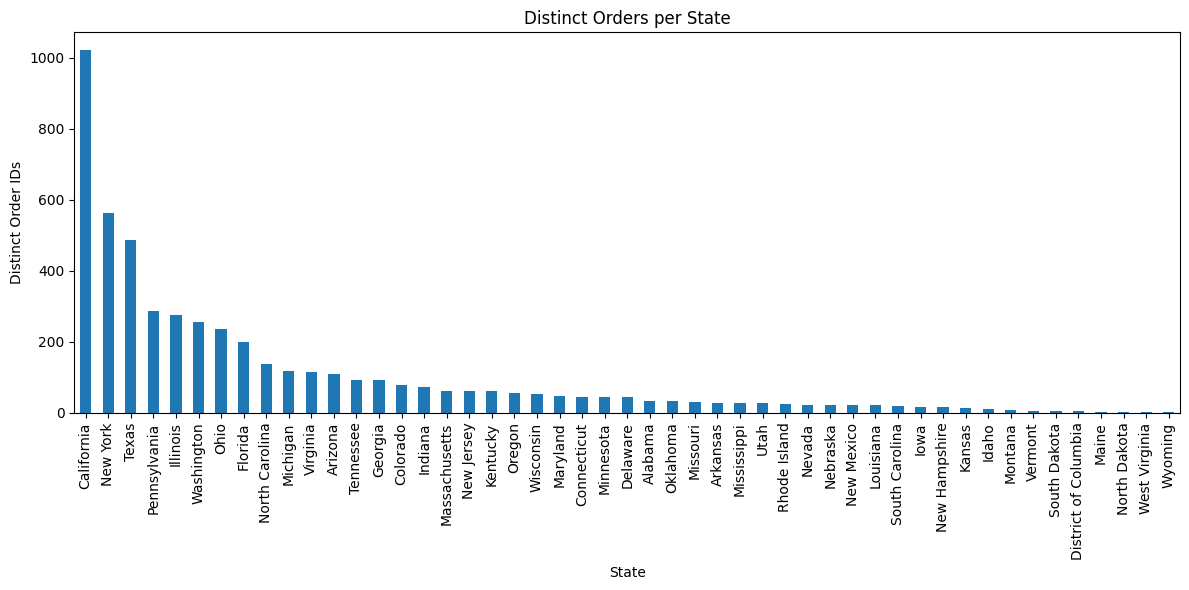

In [91]:
# State-level distinct order counts
orders_per_state = df.groupby('State')['Order ID'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12,6))
orders_per_state.plot(kind='bar')
plt.title('Distinct Orders per State')
plt.xlabel('State')
plt.ylabel('Distinct Order IDs')
plt.xticks(rotation=90)
plt.tight_layout()
orders_per_state.describe()

In [92]:
# Check whether (Sales + Discount) / Quantity gives a stable implied unit price per product
# (Discount stores the absolute dollar reduction from the list price in this dataset).
df['Implied Unit Price'] = (df['Sales'] + df['Discount']) / df['Quantity']

summary_by_product = (
    df.groupby('Product Name')['Implied Unit Price']
    .agg(count='count', mean='mean', std='std', minimum='min', maximum='max')
)
summary_by_product = summary_by_product.assign(
    price_range=lambda x: x['maximum'] - x['minimum'],
    rel_spread=lambda x: (x['price_range'] / x['mean']).fillna(0),
    constant_price=lambda x: x['price_range'] < 1e-6
)

price_consistency = summary_by_product['constant_price'].mean() * 100
print(f"{price_consistency:.1f}% of products have the same implied unit price across all orders.")

summary_by_product.sort_values('rel_spread', ascending=False).head(10)

13.8% of products have the same implied unit price across all orders.


,count,mean,std,minimum,maximum,price_range,rel_spread,constant_price
Product Name,,,,,,,,
Easy-staple paper,46,18.653858,14.041892,3.490667,55.98,52.489333,2.813859,False
Staple envelope,48,9.608375,5.953058,4.530667,30.98,26.449333,2.752737,False
"Premier Elliptical Ring Binder, Black",9,10.991841,7.419644,6.202286,30.44,24.237714,2.205064,False
Insertable Tab Post Binder Dividers,8,3.604869,2.323678,1.718286,8.02,6.301714,1.748112,False
GBC VeloBinder Strips,4,3.552875,2.772456,1.696000,7.68,5.984000,1.684270,False
GBC Ibimaster 500 Manual ProClick Binding System,9,363.710815,227.535493,152.356000,760.98,608.624000,1.673373,False
Staples,46,3.803792,1.823736,1.529000,7.89,6.361000,1.672278,False
3.6 Cubic Foot Counter Height Office Refrigerator,5,141.672933,114.654297,59.084000,294.62,235.536000,1.662534,False
Avery Recycled Flexi-View Covers for Binding Systems,7,7.691286,5.748348,3.286000,16.03,12.744000,1.656940,False


In [93]:
# Inspect the product with the highest relative spread to show how implied unit price varies even for a single SKU
top_rel_spread = summary_by_product['rel_spread'].idxmax()
product_orders = df[df['Product Name'] == top_rel_spread].copy()
product_orders['Implied Unit Price'] = (product_orders['Sales'] + product_orders['Discount']) / product_orders['Quantity']
print(f"Product with highest spread: {top_rel_spread}")
print(product_orders[['Order ID','Sales','Quantity','Implied Unit Price']].sort_values('Implied Unit Price').head(5))
print(product_orders[['Order ID','Sales','Quantity','Implied Unit Price']].sort_values('Implied Unit Price', ascending=False).head(5))
print('Implied price range:', product_orders['Implied Unit Price'].min(), 'to', product_orders['Implied Unit Price'].max())

Product with highest spread: Easy-staple paper
            Order ID   Sales  Quantity  Implied Unit Price
1747  CA-2016-155670  10.272         3            3.490667
9418  CA-2014-148285  11.952         3            4.050667
4131  CA-2015-111703  11.952         3            4.050667
5896  CA-2014-168305  21.400         5            4.280000
8669  CA-2015-158918  17.120         4            4.280000
            Order ID   Sales  Quantity  Implied Unit Price
9498  CA-2017-118213  167.94         3               55.98
4360  CA-2016-127642  111.96         2               55.98
2304  CA-2017-157931  106.32         3               35.44
3446  CA-2016-158869   70.88         2               35.44
8415  CA-2017-107265  106.32         3               35.44
Implied price range: 3.4906666666666664 to 55.98


### Example: single product with wide implied price range
- This output drills into the product whose `(Sales + Discount) / Quantity` values vary the most, showing the cheapest and most expensive orders for the same SKU.
- Even for one SKU, the implied unit price can differ by more than double between two entries, explaining the large minimum-to-maximum gaps you observed.
- The spreads come from differences in order quantities, any hidden promotions, and rounding, so `(Sales + Discount) / Quantity` is the correct metric but you should expect variation when reviewing the raw order records.

### Unit price consistency check
- Implied unit price is computed as `(Sales + Discount) / Quantity`, so we can verify whether the recorded sales plus the captured discount equals the per-unit charge for every order.
- The code cell above prints the percentage of products whose implied price never changes and then lists the 10 products with the largest relative spread in implied unit price.
- If that percentage is high and the listed spreads are tiny, the dataset confirms that `Sales` plus `Discount` already matches unit pricing; any noticeable spreads deserve a quick spot-check in the original data.

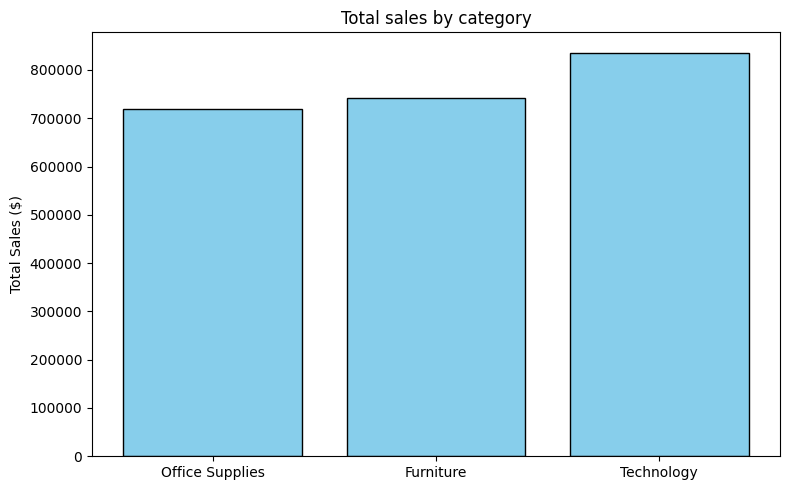

In [94]:
import matplotlib.pyplot as plt
category_sales = df.groupby('Category')['Sales'].sum().sort_values()
plt.figure(figsize=(8,5))
plt.bar(category_sales.index, category_sales.values, color='skyblue', edgecolor='black')
plt.title('Total sales by category')
plt.ylabel('Total Sales ($)')
plt.tight_layout()

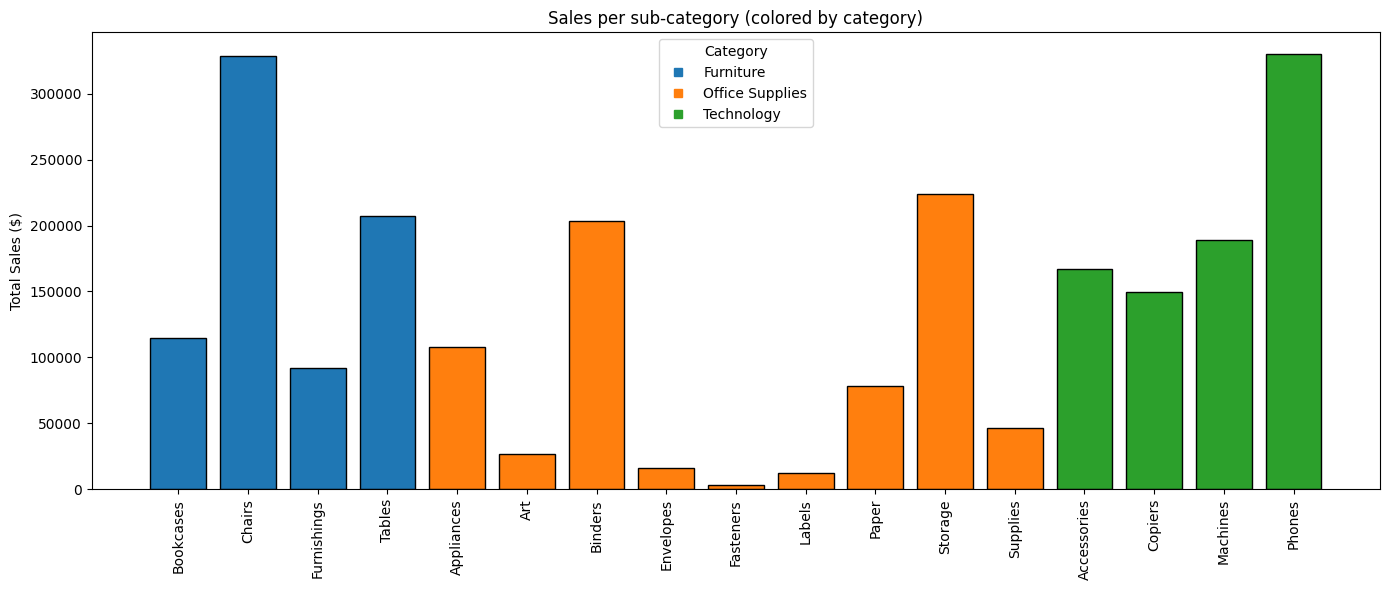

In [95]:
# Grouped histogram-like bar chart showing sub-category contribution per category
subcat_sales = (
    df.groupby(['Category','Sub-Category'])['Sales']  # group sales by category + subcategory
    .sum()  # sum sales per group
    .reset_index()  # convert MultiIndex to columns
    .sort_values(['Category','Sub-Category'])  # order so bars are grouped
)
category_order = subcat_sales['Category'].unique()  # preserve category order for coloring
colors = plt.cm.tab10(range(len(category_order)))  # pick a distinct color per category
color_map = dict(zip(category_order, colors))  # map category -> color

plt.figure(figsize=(14,6))
bars = plt.bar(
    subcat_sales['Sub-Category'],  # x-axis labels
    subcat_sales['Sales'],  # heights
    color=[color_map[c] for c in subcat_sales['Category']],  # color each bar by category
    edgecolor='black'  # outline the bars
)
plt.xticks(rotation=90)  # rotate labels so they are readable
plt.ylabel('Total Sales ($)')
plt.title('Sales per sub-category (colored by category)')
# Create legend handles per category
handles = [plt.Line2D([0],[0], color=color_map[c], marker='s', linestyle='', label=c) for c in category_order]
plt.legend(handles=handles, title='Category')
plt.tight_layout()  # fix spacing

In [96]:
# Aggregate Sales, Profit, and Discount by Category/Sub-Category
category_subcat_aggregates = (
    df.groupby(['Category','Sub-Category'])
    .agg(total_sales=('Sales','sum'),
         total_profit=('Profit','sum'),
         total_discount=('Discount','sum'),
         avg_discount=('Discount','mean'))
    .sort_values(['Category','total_sales'], ascending=[True, False])
    .reset_index()
)
category_subcat_aggregates = category_subcat_aggregates.assign(
    profit_ratio=lambda x: x['total_profit'] / x['total_sales'],
    discount_ratio=lambda x: x['total_discount'] / (x['total_sales'] + x['total_discount'])
)
category_subcat_aggregates


,Category,Sub-Category,total_sales,total_profit,total_discount,avg_discount,profit_ratio,discount_ratio
0,Furniture,Chairs,328449.1030,26590.1663,105.00,0.170178,0.080957,0.000320
1,Furniture,Tables,206965.5320,-17725.4811,83.35,0.261285,-0.085645,0.000403
2,Furniture,Bookcases,114879.9963,-3472.5560,48.14,0.211140,-0.030228,0.000419
3,Furniture,Furnishings,91705.1640,13059.1436,132.40,0.138349,0.142404,0.001442
4,Office Supplies,Storage,223843.6080,21278.8264,63.20,0.074704,0.095061,0.000282
5,Office Supplies,Binders,203412.7330,30221.7633,567.00,0.372292,0.148574,0.002780
6,Office Supplies,Appliances,107532.1610,18138.0054,77.60,0.166524,0.168675,0.000721
7,Office Supplies,Paper,78479.2060,34053.5693,102.60,0.074891,0.433918,0.001306
8,Office Supplies,Supplies,46673.5380,-1189.0995,14.60,0.076842,-0.025477,0.000313
9,Office Supplies,Art,27118.7920,6527.7870,59.60,0.074874,0.240711,0.002193


### Sales per sub-category grouped by category
- Each bar is a sub-category’s total sales, with colors indicating the high-level category so you can see both the width of individual sub-category sales and how they stack within each category.
- Rotate the xticks or filter the data if you want to highlight a specific category or region.

### Full aggregated summary
- The table above now shows each `Category` + `Sub-Category` pair sorted by category and descending sales, so every combination (not just the top five) is visible in a single output.
- `profit_ratio` is `total_profit / total_sales`, so values near 0.3 mean roughly 30% margin after discounts.
- `discount_ratio` follows `total_discount / (total_sales + total_discount)` to illustrate how much of the gross charge was discounted before reporting sales per combination.

### Sales breakdown by category
- This bar chart shows the total sales for each of the three top-level categories so you can compare how revenue is distributed at the category level.
- You can rerun the cell after filtering by time or segment to see how the totals shift.

Sub-Category
Phones         330007.0540
Chairs         328449.1030
Storage        223843.6080
Tables         206965.5320
Binders        203412.7330
Machines       189238.6310
Accessories    167380.3180
Copiers        149528.0300
Bookcases      114879.9963
Appliances     107532.1610
Furnishings     91705.1640
Paper           78479.2060
Supplies        46673.5380
Art             27118.7920
Envelopes       16476.4020
Labels          12486.3120
Fasteners        3024.2800
Name: Sales, dtype: float64

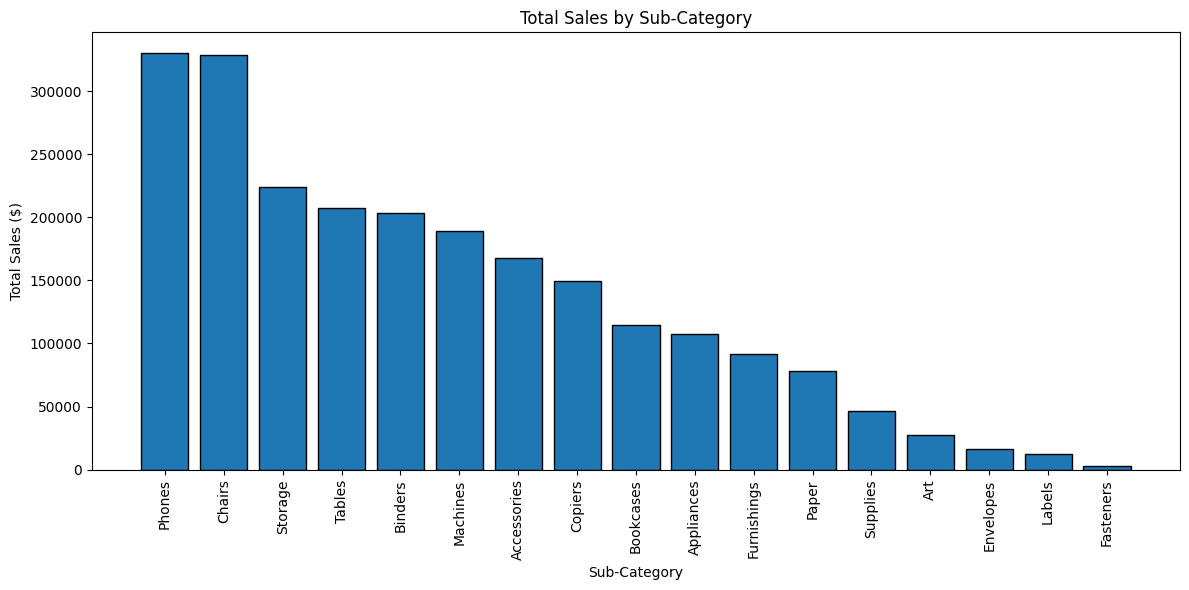

In [97]:
# Aggregate sales by sub-category
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(sales_by_subcategory.index, sales_by_subcategory.values, edgecolor='black')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)
plt.tight_layout()
sales_by_subcategory

In [98]:
# Product-level sales variation (min/max/mean/std) for identical Product ID + Name entries
prod_variation = (
    df.groupby(['Product ID','Product Name'])['Sales']
    .agg(min='min', max='max', mean='mean', std='std', count='count')
    .reset_index()
)

# Focus on high-selling chairs by filtering the product name
chair_variation = prod_variation[prod_variation['Product Name'].str.contains('chair', case=False, na=False)]
print(chair_variation.sort_values('mean', ascending=False).head(5).to_string(index=False))

     Product ID                                                     Product Name     min      max      mean         std  count
FUR-CH-10002024                     HON 5400 Series Task Chairs for Big and Tall 981.372 4416.174 2733.8220 1212.397259      8
FUR-CH-10002320                                       Hon Pagoda Stacking Chairs 256.784 2567.840 1620.9490  990.887667      4
FUR-CH-10002073                                         Hon Olson Stacker Chairs 423.648 2621.322 1356.9975  923.667361      4
FUR-CH-10002331 Hon 4700 Series Mobuis Mid-Back Task Chairs with Adjustable Arms 569.568 2563.056 1263.7290  762.744782      6
FUR-CH-10000309                                  Global Comet Stacking Arm Chair 887.271 1690.040 1216.8288  339.851454      5


In [99]:
# Variation summary for implied unit price across identical SKUs
implied_price_variation = (
    df.groupby(['Product ID','Product Name'])['Implied Unit Price']
    .agg(min='min', max='max', mean='mean', std='std', count='count')
    .reset_index()
)

# Focus on chairs to represent a high-sales segment
chair_implied_variation = implied_price_variation[implied_price_variation['Product Name'].str.contains('chair', case=False, na=False)]
chair_implied_variation.sort_values('mean', ascending=False).head(5)


,Product ID,Product Name,min,max,mean,std,count
82,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,490.719333,700.98,560.839000,74.907634,8
54,FUR-CH-10000309,Global Comet Stacking Arm Chair,295.857000,422.51,354.958400,64.027361,5
78,FUR-CH-10001854,Office Star - Professional Matrix Back Chair w...,280.824000,350.98,315.912833,37.488383,8
90,FUR-CH-10002331,Hon 4700 Series Mobuis Mid-Back Task Chairs wi...,249.286000,355.98,308.562528,43.066137,6
89,FUR-CH-10002320,Hon Pagoda Stacking Chairs,256.809000,320.98,288.938250,36.998695,4


### Implied unit price spread for identical SKUs
- Grouping by the exact `Product ID` and `Product Name` isolates the same physical SKU (Stock Keeping Unit), so the min/max/mean/std above reflect genuine order-level variation in the implied unit price.
- Filtering for chair SKUs highlights a high-sales segment where discounts, bundles, and quantity mixes can still shift the per-unit total despite the same SKU.


# All the data are in the United States.

# -Top 20 states by sales

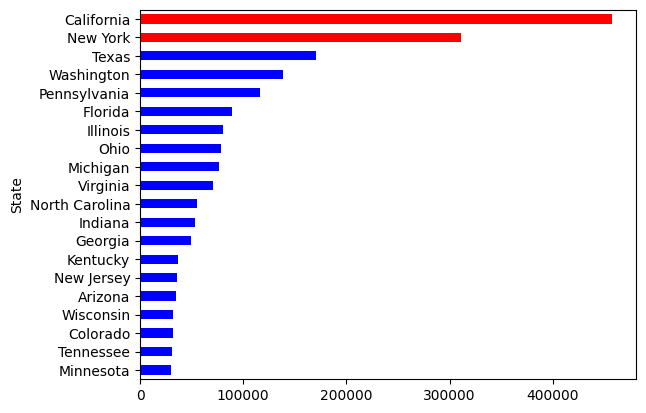

In [100]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Top 20 states by profit

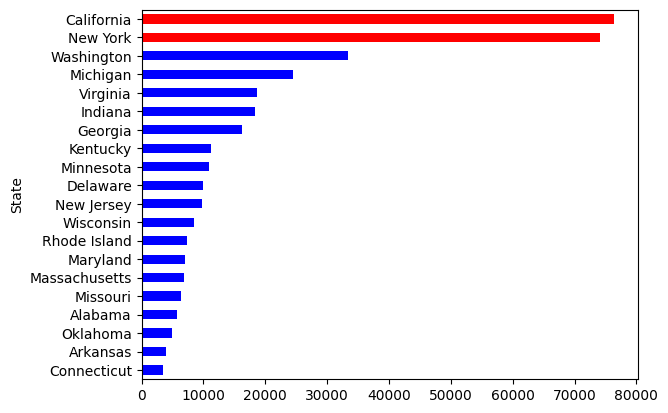

In [101]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Two important states are New York and California. New York is more profitable than California.

# -What is the difference between New York and California ?

In [102]:
df_cal=df[df['State']=='California']
df_new=df[df['State']=='New York']

# Sales and Profit scattering by customers of California

(-1000.0, 5000.0)

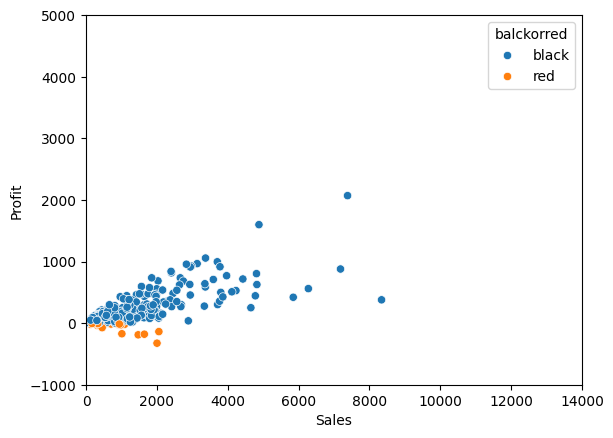

In [103]:
df_cal_customer=pd.DataFrame(df_cal.groupby('Customer Name')['Sales'].sum())
df_cal_customer['Profit']=pd.DataFrame(df_cal.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_cal_customer.loc[:,'balckorred']=df_cal_customer.loc[:,'Profit'].apply(type)


sns.scatterplot(data=df_cal_customer, hue='balckorred',x='Sales',y='Profit')
plt.xlim(0, 14000)
plt.ylim(-1000, 5000)

# Sales and Profit scattering by customers of New York

(-1000.0, 5000.0)

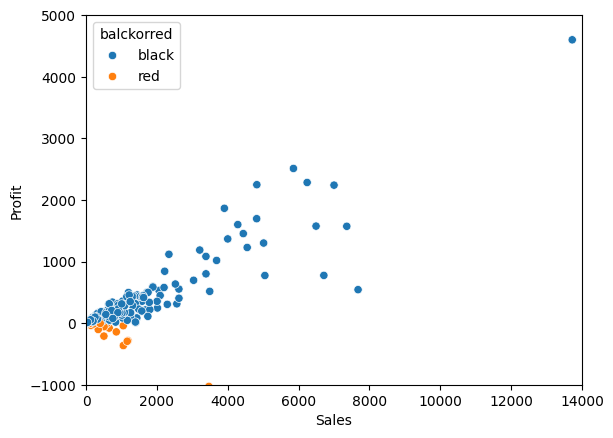

In [104]:
df_new_customer=pd.DataFrame(df_new.groupby('Customer Name')['Sales'].sum())
df_new_customer['Profit']=pd.DataFrame(df_new.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_new_customer.loc[:,'balckorred']=df_new_customer.loc[:,'Profit'].apply(type)


sns.scatterplot(data=df_new_customer, hue='balckorred',x='Sales',y='Profit')
plt.xlim(0, 14000)
plt.ylim(-1000, 5000)

# New York has a outstanding customer which is high sales and profit.

# - What is a outstanding customer in New York?

In [105]:
df_new_customer.sort_values(by=['Sales'],ascending=False).head()

,Sales,Profit,balckorred
Customer Name,,,
Tom Ashbrook,13723.498,4599.2073,black
Peter Fuller,7678.228,543.2819,black
Seth Vernon,7359.918,1571.7964,black
Tom Boeckenhauer,6999.960,2239.9872,black
Greg Tran,6712.744,774.7935,black


# 'Tom Ashbrook' contributes a lot to high profitability of New York.

In [106]:
#Sales and Profit of California
df_cal_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,577.0,793.219465,1089.711102,3.984,110.0120,387.136,1059.0880,8341.2900
Profit,577.0,132.376754,210.395948,-325.572,18.4527,63.621,147.1346,2069.6196


In [107]:
#Sales and Profit of New York
df_new_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,415.0,749.099448,1345.445710,3.6400,70.21400,311.4220,795.3050,13723.4980
Profit,415.0,178.406141,413.540179,-1027.4035,15.13285,56.6044,172.9244,4599.2073


In [108]:
#Sales and Profit of New York without 'Tom Ashbrook'
df_new_noTom=df_new_customer[df_new_customer.index != 'Tom Ashbrook']
df_new_noTom.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,414.0,717.760321,1185.762163,3.6400,70.213000,310.89300,789.35200,7678.2280
Profit,414.0,167.727878,352.128496,-1027.4035,15.129825,56.51905,172.26315,2510.8903


# If New York does not have 'Tom Ashbook', their average sales goes down from 749 to 717,and their average profit goes down from 178 to 167.But New York is still more profitable than California.

# - Are there any difference among states in profitability ?

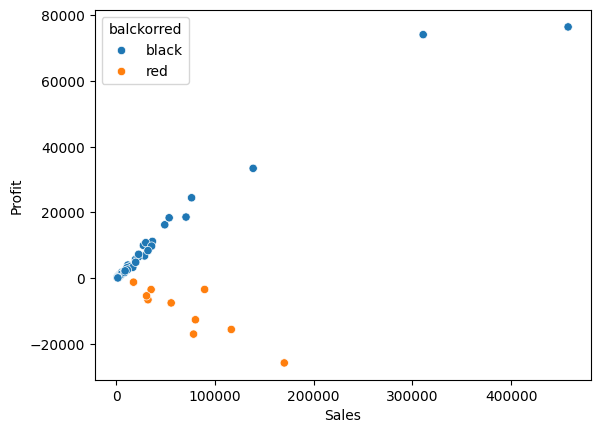

In [109]:
df_state=pd.DataFrame(df.groupby('State')['Sales'].sum())
df_state['Profit']=pd.DataFrame(df.groupby('State')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_state.loc[:,'balckorred']=df_state.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_state, hue='balckorred',x='Sales',y='Profit');

# We can divide states to 'Black States'(+proift) and 'Red States'(-profit).

# -Top 20 cities by Sales

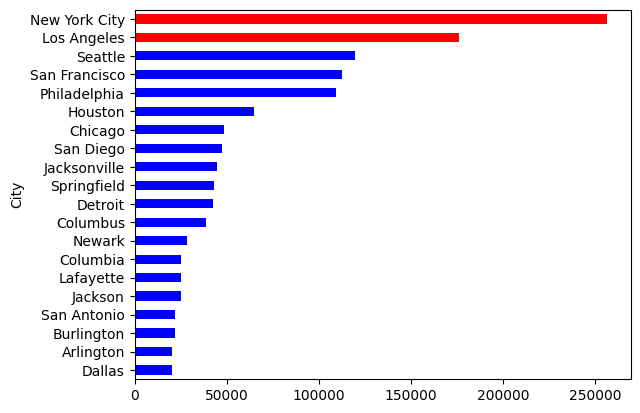

In [110]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('City')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Top 20 cities by Profit

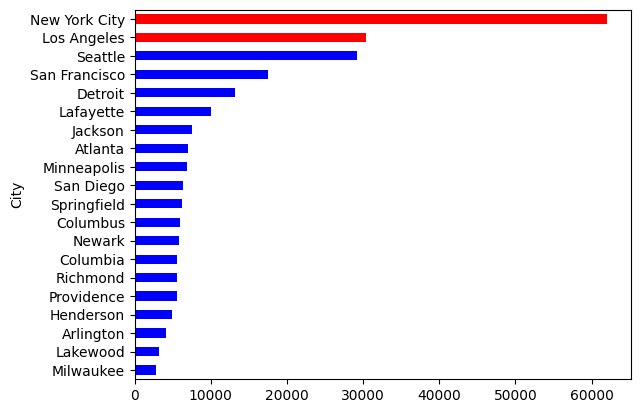

In [111]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('City')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Profitability of New York City is outstanding.

# - Are there any difference among cities in profitability ?

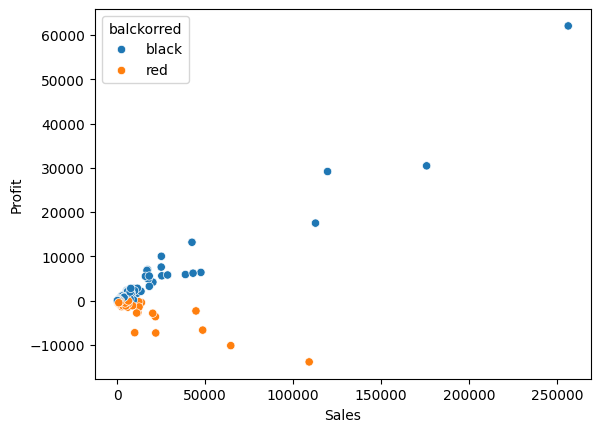

In [112]:
df_city=pd.DataFrame(df.groupby('City')['Sales'].sum())
df_city['Profit']=pd.DataFrame(df.groupby('City')['Profit'].sum())
def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_city.loc[:,'balckorred']=df_city.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_city, hue='balckorred',x='Sales',y='Profit');

# We can divide cities to 'Black Cities' and 'Red Cities'.

# -Top 20 customers by Sales

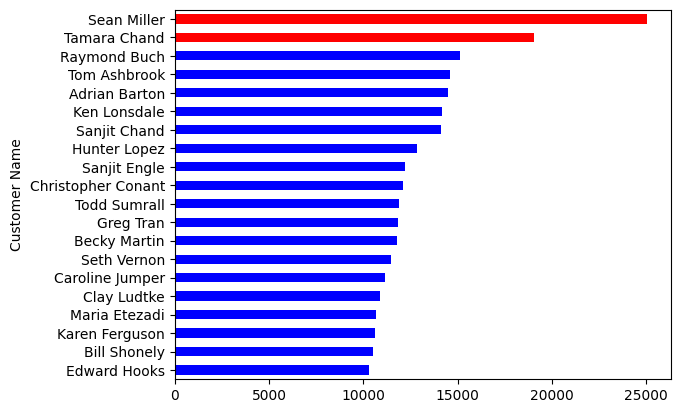

In [113]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Cumulative curve in Sales by Customers

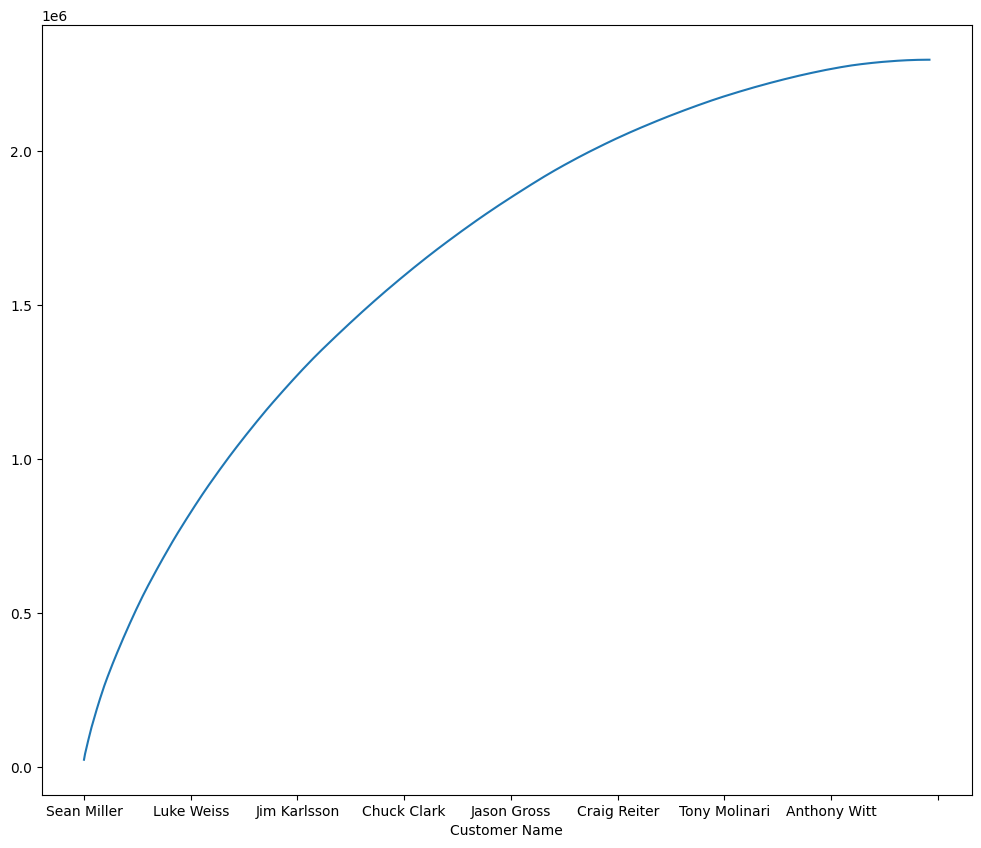

In [114]:
plt.figure(figsize=(12,10))
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).cumsum().plot();

# -Can we apply Pareto principle to customers and Sales ?

In [115]:
df1=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False))

In [116]:
df1.quantile(0.7, interpolation='higher')

Sales    3288.11
Name: 0.7, dtype: float64

In [117]:
df1[df1['Sales']>=3288.11].sum()/df['Sales'].sum()

Sales    0.609223
dtype: float64

# Top 30% occupy 60% of sales!

# -Top 20 customers by Profit

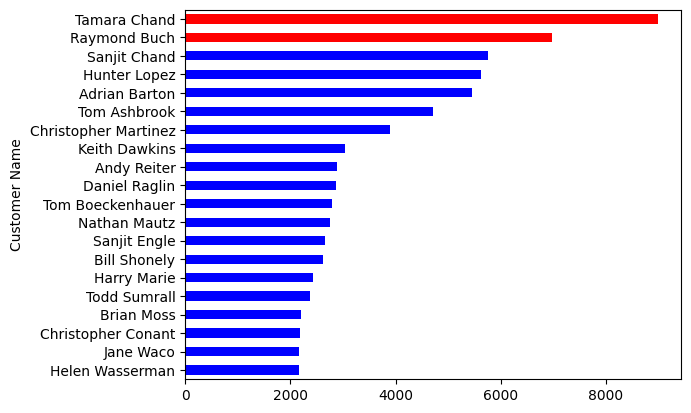

In [118]:
colors = ['blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','red','red']
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# -Cumulative curve in Profit by Customers

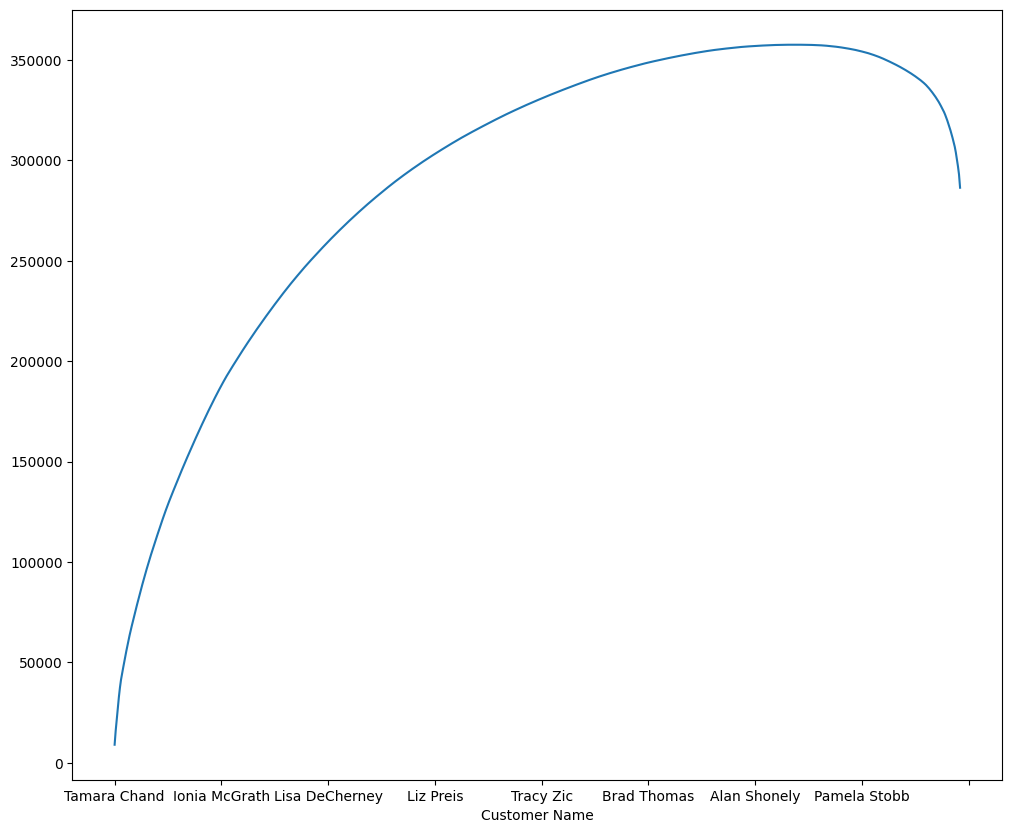

In [119]:
plt.figure(figsize=(12,10))
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).cumsum().plot();

# -Can we apply Pareto principle to customers and Profit ?

In [120]:
df2=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))

In [121]:
df2.quantile(0.7, interpolation='higher')

Profit    463.269
Name: 0.7, dtype: float64

In [122]:
df2[df2['Profit']>=463.269].sum()/df['Profit'].sum()

Profit    0.971351
dtype: float64

# Top 30% occupy 97% of Profit! It means that how we can manage top 30% profit customers is very important !

# - Are there any difference among customers in profitability ?

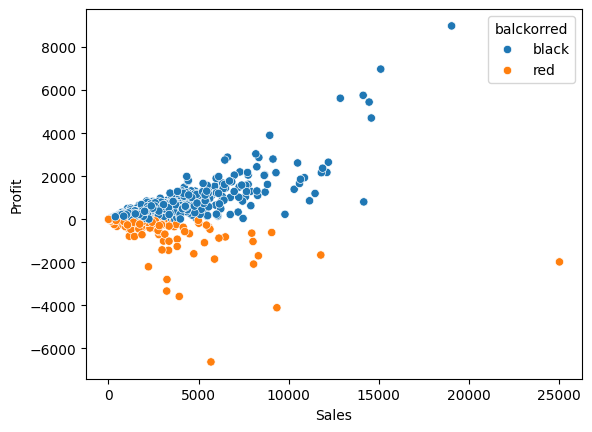

In [123]:
df_customer=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum())
df_customer['Profit']=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_customer.loc[:,'balckorred']=df_customer.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_customer, hue='balckorred',x='Sales',y='Profit');

# One of problems is that top1 sales customer is in negative profit. So how we can turn it to positive is very important.

# -Sales by Categories

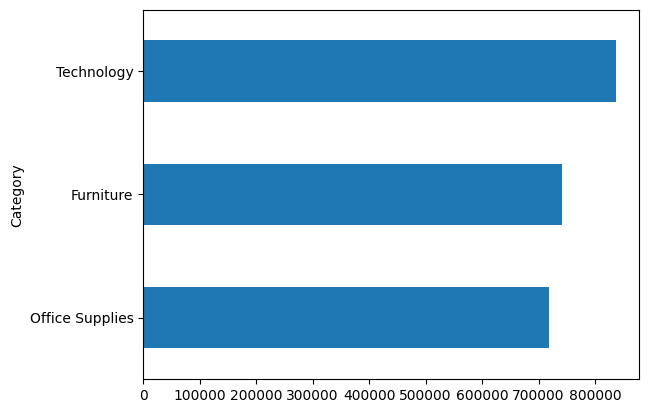

In [124]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=True).plot.barh();

# -Profit by Categories

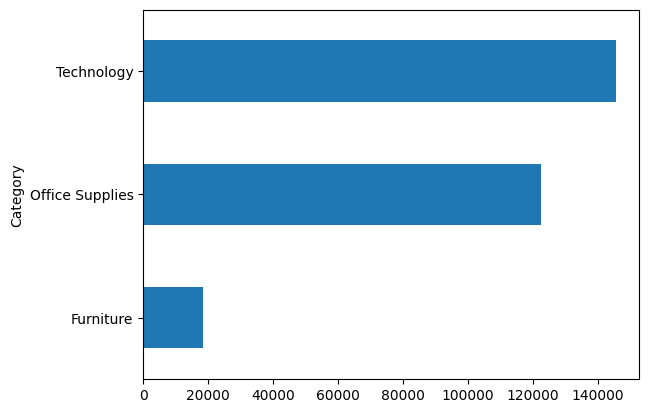

In [125]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=True).plot.barh();

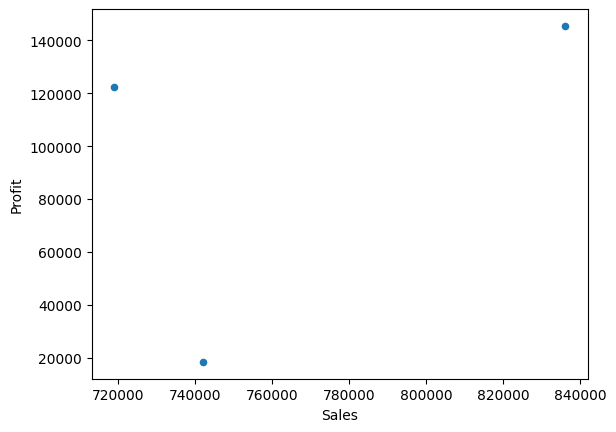

In [126]:
df_category=pd.DataFrame(df.groupby('Category')['Sales'].sum())
df_category['Profit']=pd.DataFrame(df.groupby('Category')['Profit'].sum())
df_category.plot.scatter(x='Sales',y='Profit');

# Office Supplies is most profitable !

# -Sub Categories by Sales

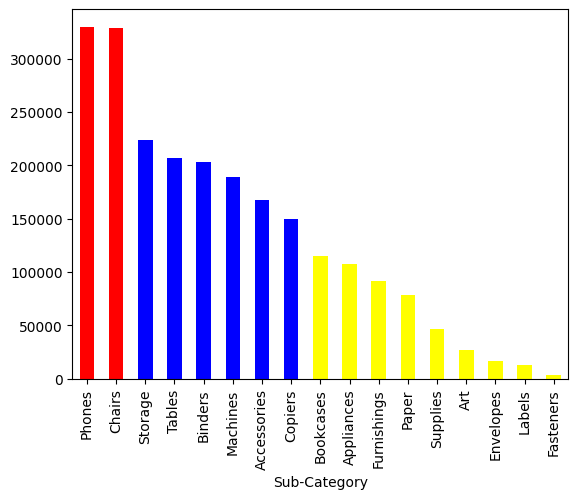

In [127]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=colors);

# -Sub Categories by Profit

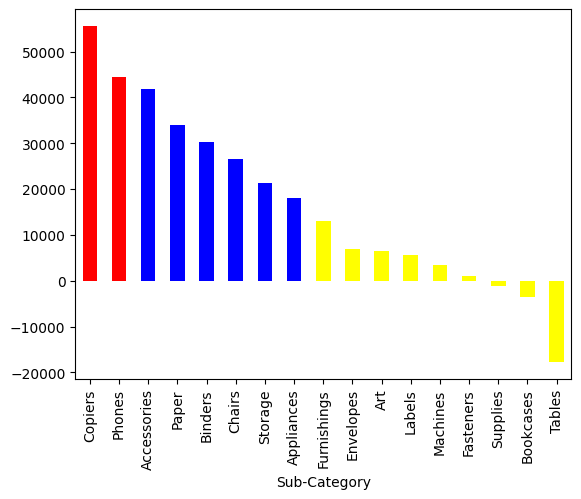

In [128]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=colors);

# - Are there any difference among sub categories in profitability ?

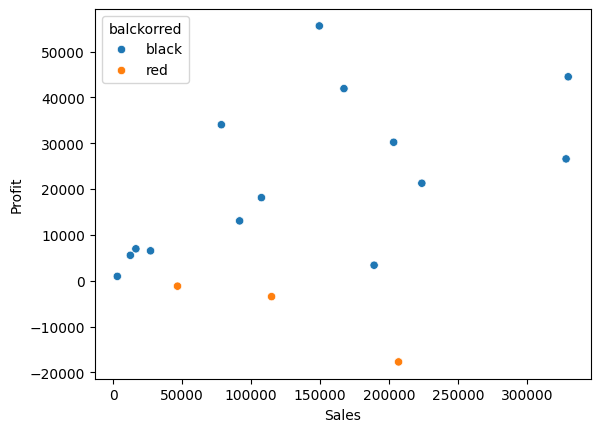

In [129]:
df_subcategory=pd.DataFrame(df.groupby('Sub-Category')['Sales'].sum())
df_subcategory['Profit']=pd.DataFrame(df.groupby('Sub-Category')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_subcategory.loc[:,'balckorred']=df_subcategory.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_subcategory, hue='balckorred',x='Sales',y='Profit');

# -Time Series Analysis

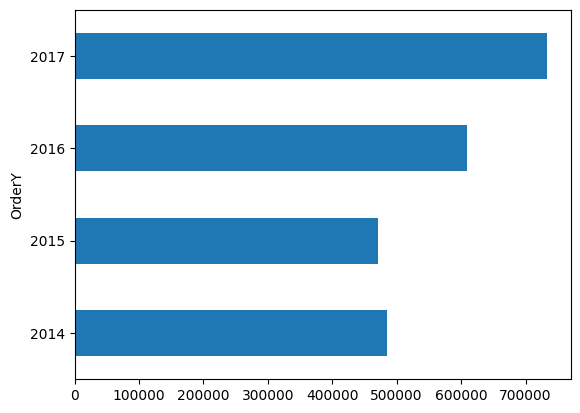

In [130]:
df.groupby('OrderY')['Sales'].sum().plot.barh();

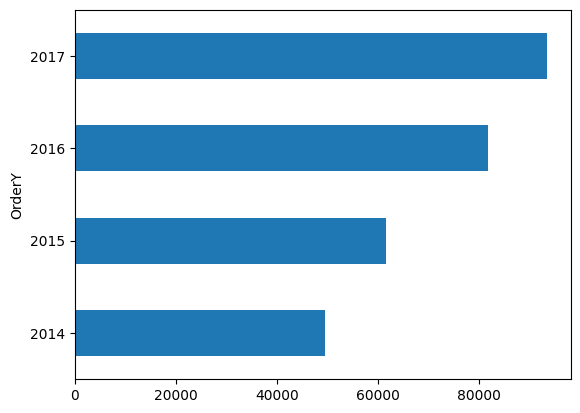

In [131]:
df.groupby('OrderY')['Profit'].sum().plot.barh();

# Sales and Profit has been growing year by year.

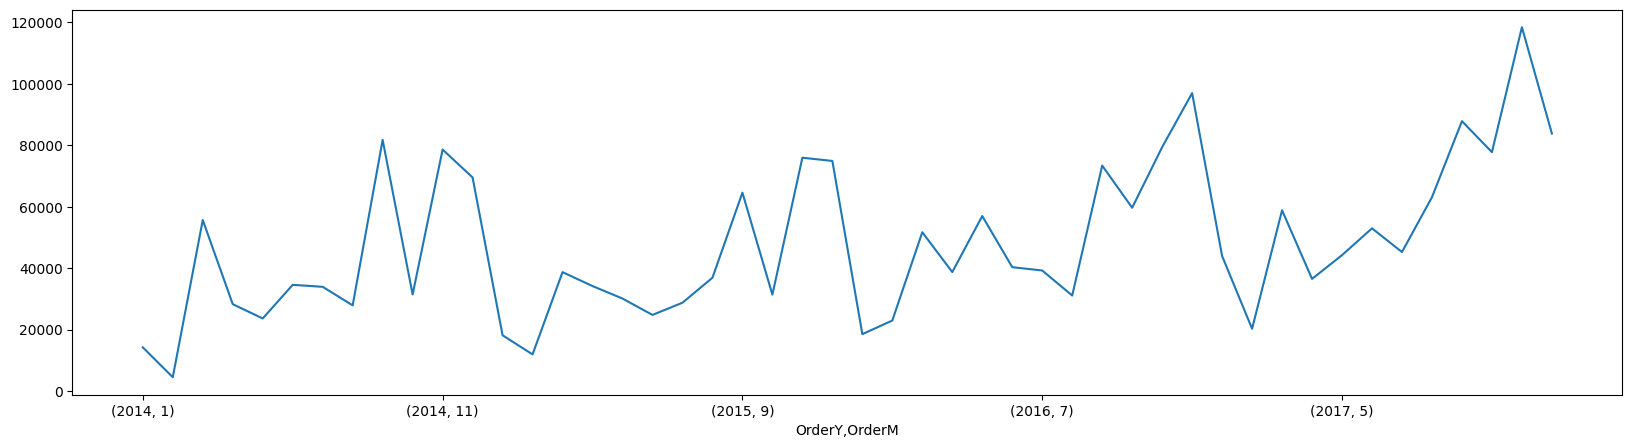

In [132]:
plt.figure(figsize=(20,5))
df.groupby(['OrderY','OrderM'])['Sales'].sum().plot();

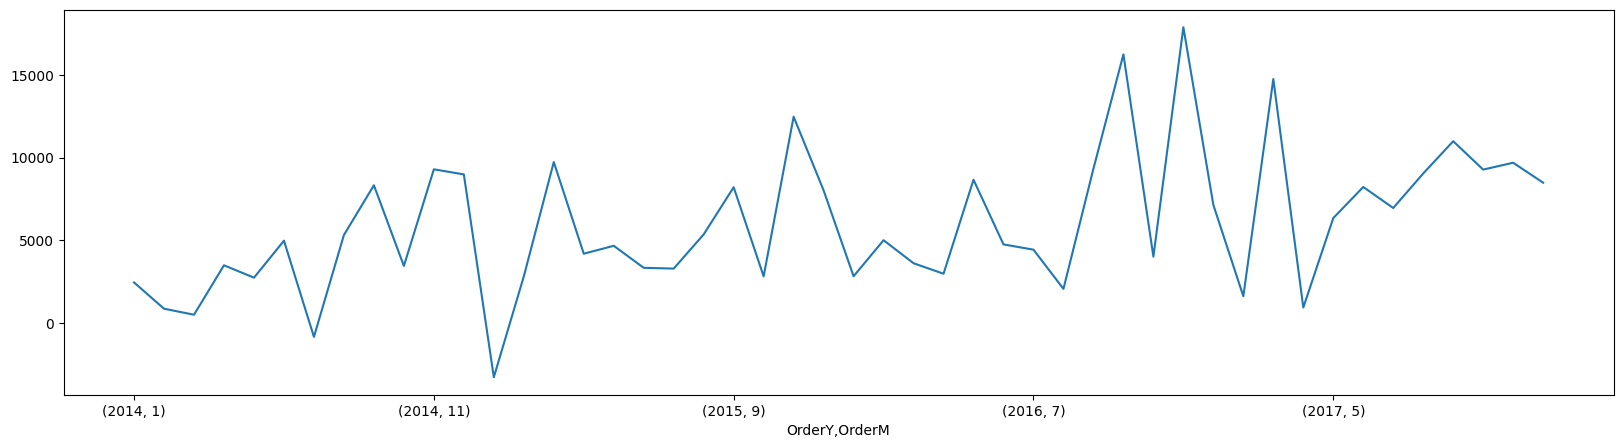

In [133]:
plt.figure(figsize=(20,5))
df.groupby(['OrderY','OrderM'])['Profit'].sum().plot();

# Next Step is that
* Considering and make a decition about how we can prioritize states and cities.
* Considering and make a decition about how we can prioritize customers.
* Considering and make a decition about how we can prioritize product.
to grow sales and improve profitability.

And we may be able to forcast sales and profit with time series analysis.

Thank you!